In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
dfNewsauto = pd.read_excel("/gdrive/My Drive/Colab Notebooks/BD2021/Final Exercise/NewsAuto/NewsautoDF.xlsx")

In [5]:
dfNewsauto

title  ...                                                url
0    Το ηλεκτρικό επαγγελματικό Peugeot e-Expert «κ...  ...  https://www.newsauto.gr/news/to-ilektriko-epan...
1         Audi: Νέο ηλεκτρικό στη θέση του επόμενου A1  ...  https://www.newsauto.gr/news/audi-neo-ilektrik...
2    Crossover το πρώτο ηλεκτρικό μοντέλο της συνερ...  ...  https://www.newsauto.gr/news/crossover-to-prot...
3      Το πρώτο ηλεκτρικό αυτοκινούμενο είναι της LEVC  ...  https://www.newsauto.gr/news/to-proto-ilektrik...
4    Elation Freedom: Το ηλεκτρικό hypercar των 1.4...  ...  https://www.newsauto.gr/news/elation-freedom-t...
..                                                 ...  ...                                                ...
482    Χαμηλή η… τάση στο πρόγραμμα Κινούμαι Ηλεκτρικά  ...  https://www.newsauto.gr/electric/chamili-i-tas...
483                 Νέο ηλεκτρικό μοντέλο από την Κίνα  ...  https://www.newsauto.gr/news/neo-ilektriko-mon...
484                   Kia: 7 νέα ηλεκτρικά έως το 2027  ...  https://www.newsauto.gr/news/kia-7-nea-ilektri...
485       Με αυτονομία 500 χλμ η νέα Mercedes-Benz EQB  ...  https://www.newsauto.gr/news/me-aftonomia-500-...
486         Καλοκαίρι του 2021 η παρουσίαση των Rivian  ...  https://www.newsauto.gr/news/kalokeri-tou-2021...

[487 rows x 6 columns]

In [6]:
dfNewsauto.dtypes

title     object
date      object
author    object
lead      object
body      object
url       object
dtype: object

In [7]:
dfNewsauto.shape

(487, 6)

In [8]:
dfNewsauto.describe

<bound method NDFrame.describe of                                                  title  ...                                                url
0    Το ηλεκτρικό επαγγελματικό Peugeot e-Expert «κ...  ...  https://www.newsauto.gr/news/to-ilektriko-epan...
1         Audi: Νέο ηλεκτρικό στη θέση του επόμενου A1  ...  https://www.newsauto.gr/news/audi-neo-ilektrik...
2    Crossover το πρώτο ηλεκτρικό μοντέλο της συνερ...  ...  https://www.newsauto.gr/news/crossover-to-prot...
3      Το πρώτο ηλεκτρικό αυτοκινούμενο είναι της LEVC  ...  https://www.newsauto.gr/news/to-proto-ilektrik...
4    Elation Freedom: Το ηλεκτρικό hypercar των 1.4...  ...  https://www.newsauto.gr/news/elation-freedom-t...
..                                                 ...  ...                                                ...
482    Χαμηλή η… τάση στο πρόγραμμα Κινούμαι Ηλεκτρικά  ...  https://www.newsauto.gr/electric/chamili-i-tas...
483                 Νέο ηλεκτρικό μοντέλο από την Κίνα  ...  https://www.newsa

**3. Καθάρισμα**

In [9]:
#Δεν έχουμε καθόλου NaN Values
dfNewsauto.isnull()

title   date  author   lead   body    url
0    False  False   False  False  False  False
1    False  False   False  False  False  False
2    False  False   False  False  False  False
3    False  False   False  False  False  False
4    False  False   False  False  False  False
..     ...    ...     ...    ...    ...    ...
482  False  False   False  False  False  False
483  False  False   False  False  False  False
484  False  False   False  False  False  False
485  False  False   False  False  False  False
486  False  False   False  False  False  False

[487 rows x 6 columns]

In [10]:
dfNewsauto['body'] = dfNewsauto['body'].str.replace(r'https?:\/\/.*[\r\n]*',"")

In [11]:
dfNewsauto['body']

0      [<p>Νέα… ηλεκτρική πρόταση στην κατηγορία των ...
1      [<p>Η <a href="<span id="more-356248"></span><...
2      [<p>Μέσα στο 2023 πιθανολογείται η πρεμιέρα το...
3      [<p>Η εταιρεία <a href="<span id="more-388291"...
4      [<p>Οι μικροί και άγνωστοι κατασκευαστές αυτοκ...
                             ...                        
482    [<p>Μόλις 909 ιδιοκτήτες ηλεκτρικών οχημάτων έ...
483    [<p>Η <a href="<span id="more-332004"></span><...
484    [<p>Η <a href="<span id="more-352206"></span><...
485    [<p>Η <a href="<span id="more-359431"></span><...
486    [<p>Η <a href="<span id="more-339642"></span><...
Name: body, Length: 487, dtype: object

In [12]:
dfNewsauto['body'] = dfNewsauto['body'].str.replace("<strong>", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("</strong>", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("<p>", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("</p>", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("<p", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("<br/>", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("<span id=", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("more", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("<em>", "") 
dfNewsauto['body'] = dfNewsauto['body'].str.replace("</em>", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("class", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("content-img-wrap", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("aligncenter size-full wp-image", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("lazy-image", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("data-src=", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("https://www.newsauto.gr/wp-content/uploads", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace(".jpg", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("data-wset", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("height", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("loading", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("lazy", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("sizes", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("max-width", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("src", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("width", "")

In [13]:
dfNewsauto['body'] = dfNewsauto['body'].str.replace("</span>", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("a href", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("href", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("img", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("alt", "")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("js", "")

In [14]:
dfNewsauto['body'] = dfNewsauto['body'].str.replace("ηλεκτρικών", "ηλεκτρικό")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("ηλεκτρικά", "ηλεκτρικό")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("ηλεκτρικού", "ηλεκτρικό")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("εταιρείας", "εταιρεία")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("μοντέλα", "μοντέλο")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("μοντέλου", "μοντέλο")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("αυτοκινήτων", "αυτοκίνητο")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("αυτοκινήτου", "αυτοκίνητο")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("αυτοκίνητα", "αυτοκίνητο")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("νέα", "νέο")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("μοντέλων", "μοντέλο")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("ηλεκτρική", "ηλεκτρικό")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("οχημάτων", "οχήματα")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("μπαταριών", "μπαταρία")
dfNewsauto['body'] = dfNewsauto['body'].str.replace("αυτονομίας", "αυτονομία")


In [15]:
dfNewsauto['author'] = dfNewsauto['author'].str.replace("Κωνσταντίνος Μποϊδάνης (km@carmgz.gr)", "Κωνσταντίνος Μποϊδάνης")
dfNewsauto['author'] = dfNewsauto['author'].str.replace("Κωνσταντίνος Μποϊδάνης (Κωνσταντίνος ΜποΪδάνης)", "Κωνσταντίνος Μποϊδάνης")
dfNewsauto['author'] = dfNewsauto['author'].str.replace("του Γιάννη Σκουφή (gsk@newsauto.gr)", "Του Γιάννη Σκουφή")
dfNewsauto['author'] = dfNewsauto['author'].str.replace("Νίκος Μαρινόπουλος (nm@newsauto.gr), Φωτογραφίες: Χρήστος Καραγιωργάκης", "Νίκος Μαρινόπουλος (nm@newsauto.gr)")
dfNewsauto['author'] = dfNewsauto['author'].str.replace("Νίκος Μαρινόπουλος (nm@newsauto.gr), Φωτογραφίες: Γ. Καραγιωργάκης/ Skoda  ", "Νίκος Μαρινόπουλος (nm@newsauto.gr)")

In [16]:
NewsautoText = dfNewsauto['body'].str.cat(sep = ' ').replace("amp", ' ')

In [17]:
NewsautoText

'[Νέα… ηλεκτρικό πρόταση στην κατηγορία των επαγγελματικών van από την Peugeot. Αυτονομία κοντά στα 300 χιλιόμετρα και κόστος ρεύματος για κάθε 100 χλμ. κοντά στα 2 ευρώ. "-373839">, Έχετε αναρωτηθεί ποτέ πώς περνούν καθημερινά οι επαγγελματίες; Πώς είναι να βρίσκεσαι χωρίς… ωράριο μέσα σε ένα αυτοκίνητο και να γράφεις ατελείωτα χιλιόμετρα με σκοπό να κάνεις γρήγορα, οικονομικά και… ξεκούραστα τη δουλειά σου; Δύσκολη άσκηση θα λέγαμε αλλά χιλιάδες είναι οι επαγγελματίες που ψάχνουν το κατάλληλο όχημα για να κάνουν τη ζωή τους πιο άνετη και φυσικά πιο κερδοφόρα., Μετά τα ηλεκτρικό επιβατικά οχήματα έχουν αρχίσει να κάνουν την εμφάνισή τους και τα αντίστοιχα επαγγελματικά, που θεωρείται σίγουρο ότι θα παίξουν σημαντικό ρόλο στην κατηγορία. Πριν από λίγες ημέρες έκανε την εμφάνισή του το πρώτο αμιγώς ηλεκτρικό βαν της <=" [Η <=""-356248">, Η ηλεκτρικό κινητικότητα αποτελεί πλέον μία πάγια προτεραιότητα για την Audi, με την γερμανική εταιρεία να «παγώνει» την εξέλιξη αρκετών μοντέλο με θερ

#4. Αφαίρεση Stopwords, Lemmatization, 7. Wordcloud**

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [19]:
list(STOPWORDS)[0:20]

['then',
 "they'd",
 'this',
 'than',
 'get',
 'your',
 'itself',
 "she'll",
 "you'll",
 'myself',
 'once',
 'again',
 'or',
 'how',
 'can',
 'from',
 'who',
 'we',
 "wouldn't",
 'but']

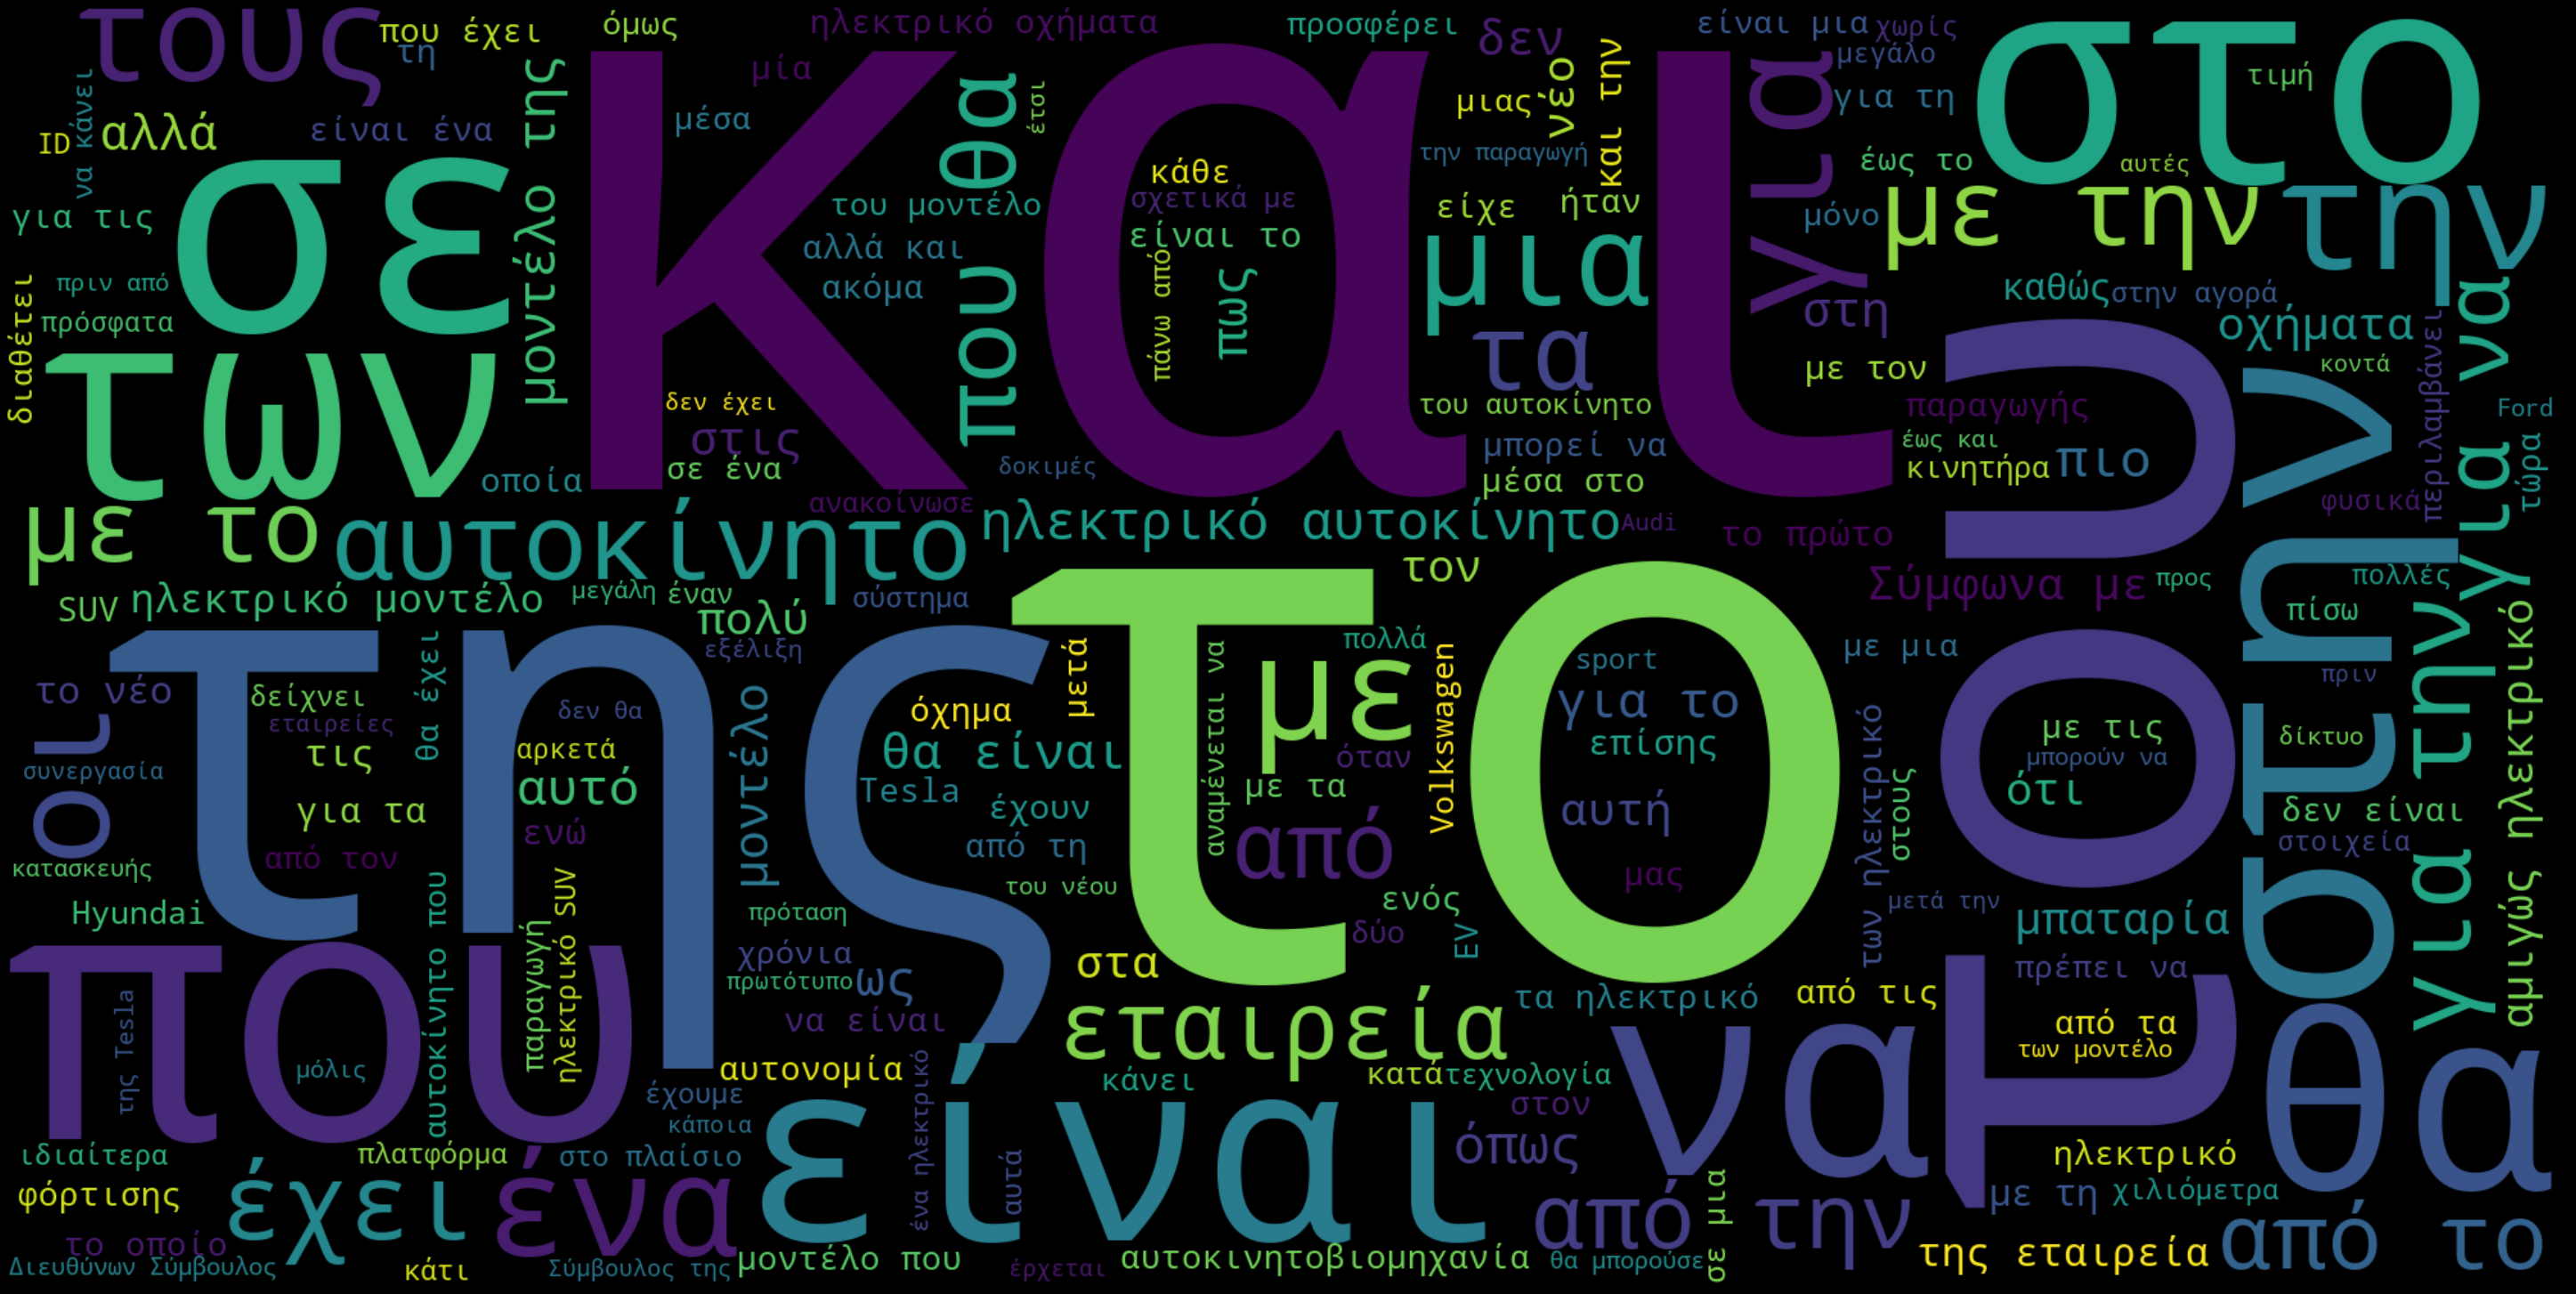

In [20]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(NewsautoText)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
import spacy

In [22]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
# Επειτα κάνουμε Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download...

In [23]:
nlp = spacy.load('el_core_news_sm')

In [24]:
list(nlp.Defaults.stop_words)[0:20]

['ήδη',
 'συχνάς',
 'πούθε',
 'εκάστους',
 'μόνην',
 'εσάς',
 'δικούς',
 'ποιά',
 'τρεις',
 'μόλις',
 'δικός',
 'κλπ',
 'ίδιον',
 'αφού',
 'τούτην',
 'τίποτα',
 'μερικοί',
 'όποιον',
 'έκαστος',
 'οποιουδήποτε']

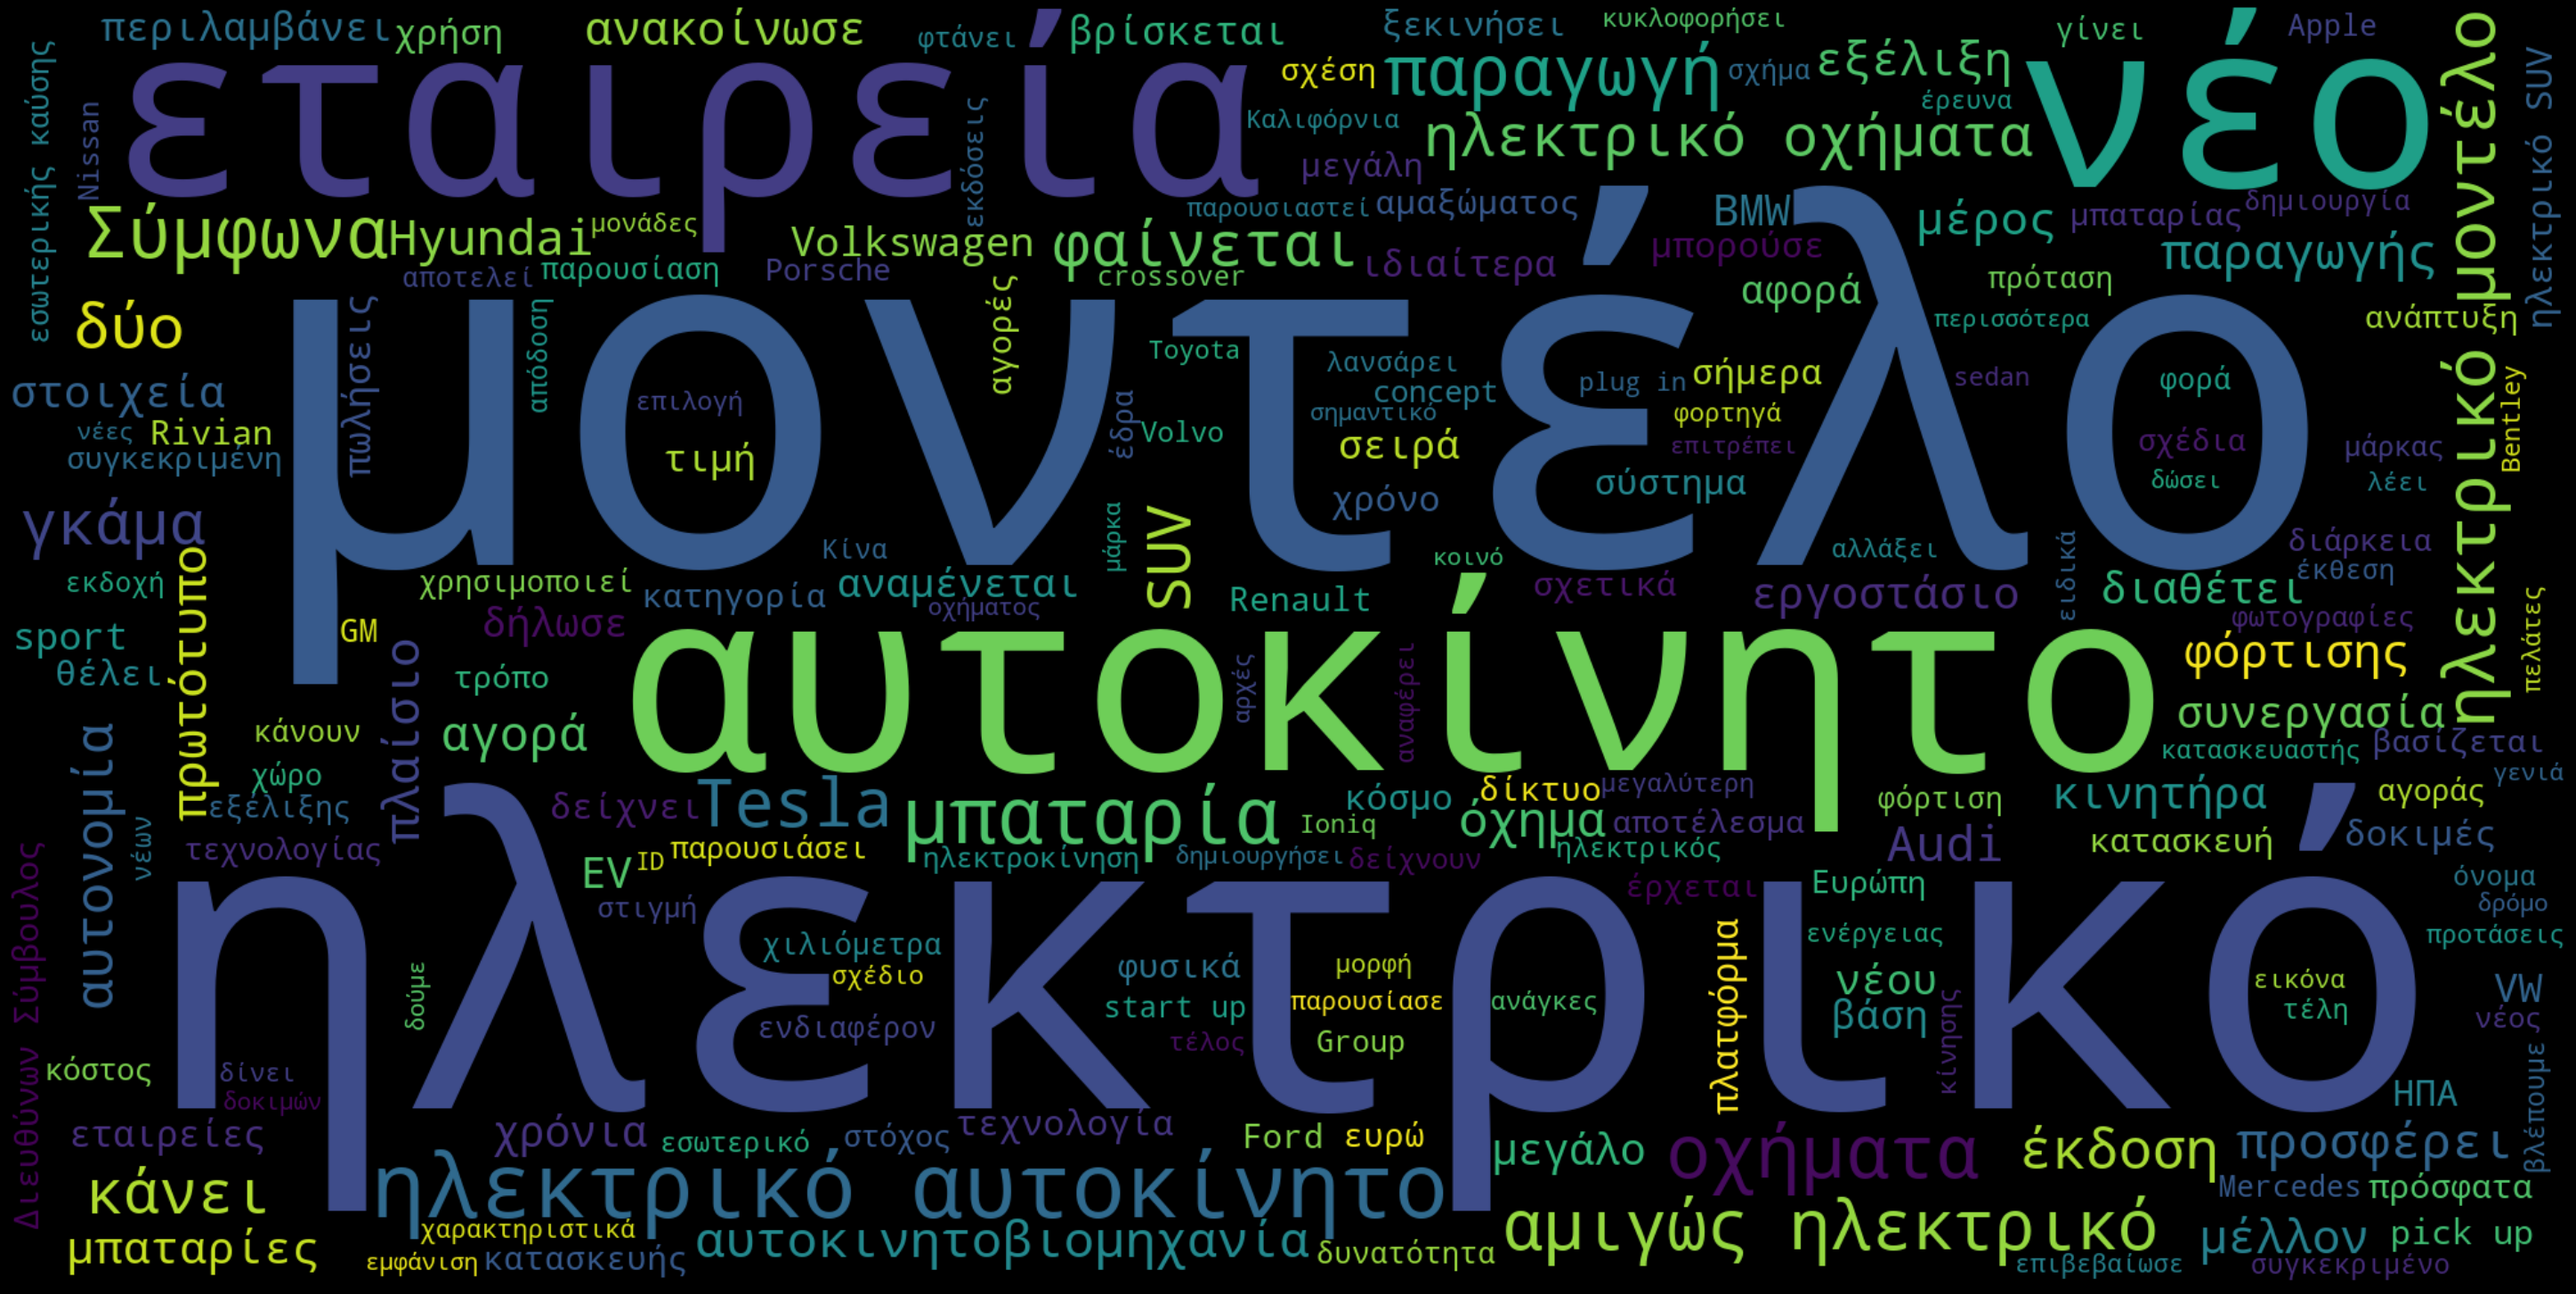

In [25]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(NewsautoText)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο... Lemmatization

In [26]:
doc = nlp(dfNewsauto['body'][1])

In [27]:
for token in doc:
    print(token, token.lemma_)

[ [
Η η
< <
= =
" "
" "
-356248 -356248
" "
> >
, ,
Η η
ηλεκτρικό ηλεκτρικό
κινητικότητα κινητικότητα
αποτελεί αποτελώ
πλέον πλέον
μία μία
πάγια πάγιο
προτεραιότητα προτεραιότητα
για για
την την
Audi audi
, ,
με με
την την
γερμανική γερμανικός
εταιρεία εταιρεία
να να
« «
παγώνει παγώνω
» »
την την
εξέλιξη εξέλιξη
αρκετών αρκετή
μοντέλο μοντέλο
με με
θερμικά θερμικά
σύνολα σύνολο
, ,
θέλοντας θέλω
να να
περιορίσει περιορίσω
παράλληλα παράλληλα
και και
τα τα
αυξημένα αυξημένος
κόστη κόστη
κατασκευής κατασκευή
των των
EV ev
οχήματα οχήματο
της της
. .
, ,
   
= =
" "
" "
> >
< <
= =
" "
" "
= =
" "
-356269 -356269
- -
" "
" "


In [28]:
' '.join(token.lemma_ for token in doc)

'[ η < = " " -356248 " > , η ηλεκτρικό κινητικότητα αποτελώ πλέον μία πάγιο προτεραιότητα για την audi , με την γερμανικός εταιρεία να « παγώνω » την εξέλιξη αρκετή μοντέλο με θερμικά σύνολο , θέλω να περιορίσω παράλληλα και τα αυξημένος κόστη κατασκευή των ev οχήματο της . ,   = " " > < = " " = " -356269 - " "'

In [29]:
NewsautoText

'[Νέα… ηλεκτρικό πρόταση στην κατηγορία των επαγγελματικών van από την Peugeot. Αυτονομία κοντά στα 300 χιλιόμετρα και κόστος ρεύματος για κάθε 100 χλμ. κοντά στα 2 ευρώ. "-373839">, Έχετε αναρωτηθεί ποτέ πώς περνούν καθημερινά οι επαγγελματίες; Πώς είναι να βρίσκεσαι χωρίς… ωράριο μέσα σε ένα αυτοκίνητο και να γράφεις ατελείωτα χιλιόμετρα με σκοπό να κάνεις γρήγορα, οικονομικά και… ξεκούραστα τη δουλειά σου; Δύσκολη άσκηση θα λέγαμε αλλά χιλιάδες είναι οι επαγγελματίες που ψάχνουν το κατάλληλο όχημα για να κάνουν τη ζωή τους πιο άνετη και φυσικά πιο κερδοφόρα., Μετά τα ηλεκτρικό επιβατικά οχήματα έχουν αρχίσει να κάνουν την εμφάνισή τους και τα αντίστοιχα επαγγελματικά, που θεωρείται σίγουρο ότι θα παίξουν σημαντικό ρόλο στην κατηγορία. Πριν από λίγες ημέρες έκανε την εμφάνισή του το πρώτο αμιγώς ηλεκτρικό βαν της <=" [Η <=""-356248">, Η ηλεκτρικό κινητικότητα αποτελεί πλέον μία πάγια προτεραιότητα για την Audi, με την γερμανική εταιρεία να «παγώνει» την εξέλιξη αρκετών μοντέλο με θερ

In [30]:
full_doc = nlp(NewsautoText)

In [31]:
full_doc

[Νέα… ηλεκτρικό πρόταση στην κατηγορία των επαγγελματικών van από την Peugeot. Αυτονομία κοντά στα 300 χιλιόμετρα και κόστος ρεύματος για κάθε 100 χλμ. κοντά στα 2 ευρώ. "-373839">, Έχετε αναρωτηθεί ποτέ πώς περνούν καθημερινά οι επαγγελματίες; Πώς είναι να βρίσκεσαι χωρίς… ωράριο μέσα σε ένα αυτοκίνητο και να γράφεις ατελείωτα χιλιόμετρα με σκοπό να κάνεις γρήγορα, οικονομικά και… ξεκούραστα τη δουλειά σου; Δύσκολη άσκηση θα λέγαμε αλλά χιλιάδες είναι οι επαγγελματίες που ψάχνουν το κατάλληλο όχημα για να κάνουν τη ζωή τους πιο άνετη και φυσικά πιο κερδοφόρα., Μετά τα ηλεκτρικό επιβατικά οχήματα έχουν αρχίσει να κάνουν την εμφάνισή τους και τα αντίστοιχα επαγγελματικά, που θεωρείται σίγουρο ότι θα παίξουν σημαντικό ρόλο στην κατηγορία. Πριν από λίγες ημέρες έκανε την εμφάνισή του το πρώτο αμιγώς ηλεκτρικό βαν της <=" [Η <=""-356248">, Η ηλεκτρικό κινητικότητα αποτελεί πλέον μία πάγια προτεραιότητα για την Audi, με την γερμανική εταιρεία να «παγώνει» την εξέλιξη αρκετών μοντέλο με θερμ

**Vectorization**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [33]:
count_vector = cv.fit_transform(dfNewsauto['body'])

In [34]:
count_vector.shape

(487, 7543)

In [35]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  10  100  102  105  10gwh  ...  ώμους  ώρα  ώρας  ώρες  ώστε  ώστιν
0    0   0    1    0    0      0  ...      0    0     0     0     0      0
1    0   0    0    0    0      0  ...      0    0     0     0     0      0
2    0   0    0    0    0      0  ...      0    0     0     0     0      0
3    0   0    0    0    0      0  ...      0    0     0     0     0      0
4    0   0    0    0    0      0  ...      0    0     0     0     0      0

[5 rows x 7543 columns]

In [36]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [37]:
count_vector = cv.fit_transform(dfNewsauto['body'])

In [38]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  10  100  12  120  180  19  ...  χώρο  όμιλος  όνομα  όχημα  όψη  ύψος  ώρα
0     0   0    1   0    0    0   0  ...     0       0      0      1    0     0    0
1     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
2     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
3     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
4     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
5     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
6     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    1
7     0   0    0   0    0    0   0  ...     1       0      0      0    0     0    0
8     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
9     1   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
10    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
11    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
12    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
13    0   0    0   0    0    0   0  ...     0       0      1      0    0     0    0
14    0   0    0   0    0    0   0  ...     0       0      1      0    0     0    0
15    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
16    0   0    0   0    0    0   1  ...     0       0      0      2    0     0    0
17    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
18    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
19    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0

[20 rows x 745 columns]

In [39]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [40]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfNewsauto['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


100  100%  2016  2017  2018  2019  ...  όμιλος  όνομας  όχημα  όψη  ύψο  ώρα
0    1     0     0     0     0     0  ...       0       0      1    0    0    0
1    0     0     0     0     0     0  ...       0       0      0    0    0    0
2    0     0     0     0     0     0  ...       0       0      0    0    0    0
3    0     0     0     0     0     0  ...       0       0      0    0    0    0
4    0     0     0     0     0     0  ...       0       0      0    0    0    0

[5 rows x 731 columns]

In [41]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfNewsauto['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

2021  suv  tesla  έκδοση  ...  παραγωγή  παραγωγής  σύμφωνα  φαίνεται
0     0    0      0       0  ...         0          0        0         0
1     0    0      0       0  ...         0          0        0         0
2     0    0      0       0  ...         0          0        0         0
3     0    0      0       0  ...         0          0        0         0
4     0    0      0       0  ...         0          0        0         0

[5 rows x 20 columns]

In [42]:
results.sum(axis =0).sort_values(ascending = False)

ηλεκτρικό     491
μοντέλο       315
αυτοκίνητο    268
εταιρεία      181
νέο           157
οχήματα       108
μπαταρία       79
suv            66
σύμφωνα        65
αμιγώς         64
tesla          60
παραγωγή       58
αυτονομία      56
δύο            52
κάνει          50
φαίνεται       49
2021           48
έκδοση         47
παραγωγής      47
γκάμα          46
dtype: int64

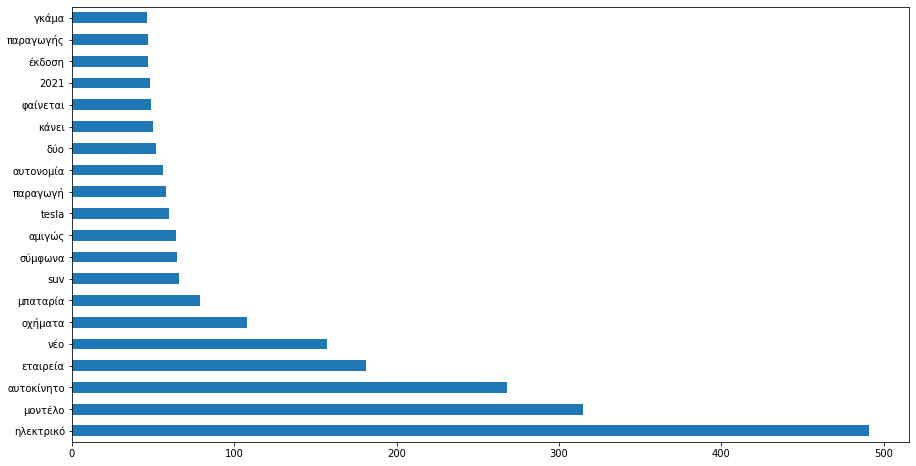

In [43]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [44]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

ηλεκτρικές  ηλεκτρική  ηλεκτροδοτηθεί  ...  ηλιακής  ηλιακοί  ηλικία
0           0          0               0  ...        0        0       0
1           0          0               0  ...        0        0       0
2           0          0               0  ...        0        0       0
3           0          0               0  ...        0        0       0
4           0          0               0  ...        0        0       0

[5 rows x 20 columns]

In [45]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bμπα[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

μπαίνει  μπαίνουμε  μπαίνουν  μπαγκάζ  μπαταρία  μπαταρίας  μπαταρίες
0        0          0         0        0         0          0          0
1        0          0         0        0         0          0          0
2        0          0         0        0         0          0          0
3        0          0         0        0         0          0          0
4        0          0         0        0         0          0          0

In [46]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

mercedes benz  pick up  ...  πλήρως ηλεκτρικό  πρόσφατη συνέντευξή
0              0        0  ...                 0                    0
1              0        0  ...                 0                    0
2              0        0  ...                 0                    0
3              0        0  ...                 0                    0
4              0        0  ...                 0                    0

[5 rows x 20 columns]

In [47]:
results.sum(axis =0).sort_values(ascending = False)

ηλεκτρικό αυτοκίνητο    95
ηλεκτρικό μοντέλο       58
αμιγώς ηλεκτρικό        56
ηλεκτρικό οχήματα       44
ηλεκτρικό suv           21
διευθύνων σύμβουλος     20
pick up                 19
νέο ηλεκτρικό           17
εσωτερικής καύσης       17
start up                16
νέο μοντέλο             13
plug in                 13
πλήρως ηλεκτρικό        12
παραγωγή ηλεκτρικό      11
λίγες μέρες             11
ηλεκτρικό sedan         11
mercedes benz           10
ηλεκτρικό crossover      9
ηλεκτρικό έκδοση         9
πρόσφατη συνέντευξή      9
dtype: int64

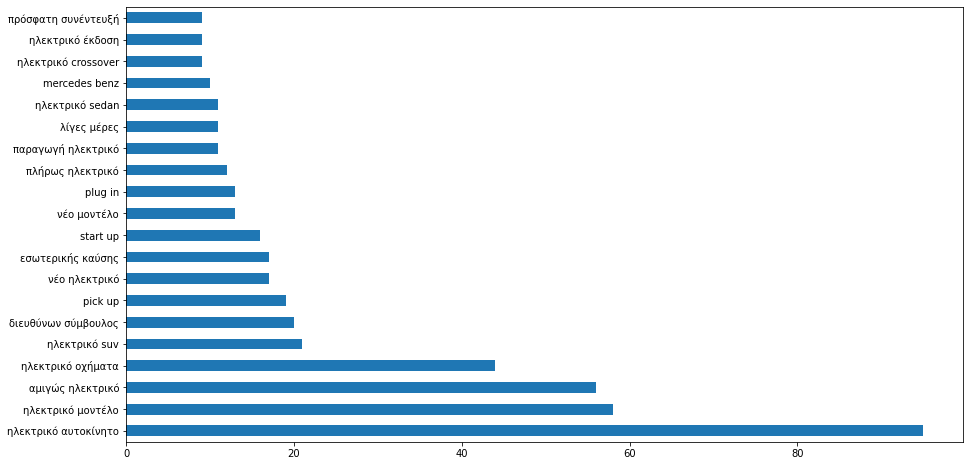

In [48]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [49]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bαυτ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

αυτοκίνηση  αυτοκίνησης  αυτοκίνητά  ...  αυτοσχέδιους  αυτοσχεδιάσουν  αυτοψία
0           0            0           0  ...             0               0        0
1           0            0           0  ...             0               0        0
2           0            0           0  ...             0               0        0
3           0            0           0  ...             0               0        0
4           0            0           0  ...             0               0        0

[5 rows x 15 columns]

In [50]:
results.sum(axis =0).sort_values(ascending = False)

αυτοκίνητο               268
αυτονομία                 56
αυτοκινητοβιομηχανία      35
αυτοκίνησης                9
αυτοκινητοβιομηχανίας      8
αυτοκινήτου                8
αυτοκίνηση                 7
αυτοκινητοβιομηχανίες      6
αυτοκίνητά                 2
αυτοψία                    1
αυτοσχεδιάσουν             1
αυτοσχέδιους               1
αυτοπεποίθηση              1
αυτομάτως                  1
αυτοκινητιστική            1
dtype: int64

11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου heatmap.

In [51]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['αυτονομία', 'μπαταρία', 'ηλεκτρικό', 'ηλεκτροκινητήρας', 'tesla', 'ηλεκτροκίνηση', 'υβριδικό', 'υδρογόνο', 'κινητήρας', 'καύσης', 'ΔΕΗ', 'φόρτιση']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head(20)

αυτονομία  μπαταρία  ηλεκτρικό  ...  καύσης  ΔΕΗ  φόρτιση
0           1         0          3  ...       0    0        0
1           0         0          1  ...       0    0        0
2           0         0          1  ...       0    0        0
3           0         0          0  ...       0    0        0
4           0         0          1  ...       0    0        0
5           0         0          0  ...       0    0        0
6           0         0          0  ...       0    0        0
7           0         0          0  ...       0    0        0
8           0         0          0  ...       0    0        0
9           0         0          1  ...       0    0        0
10          0         1          1  ...       1    0        0
11          0         0          0  ...       0    0        0
12          0         0          0  ...       0    0        0
13          2         0          5  ...       0    0        0
14          0         0          3  ...       0    0        0
15          0         0          0  ...       0    0        0
16          0         0          4  ...       0    0        0
17          1         0          1  ...       0    0        0
18          0         0          1  ...       0    0        0
19          0         0          0  ...       0    0        0

[20 rows x 12 columns]

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(dfNewsauto['body'])  #finds the tfidf score with normalization

In [54]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   10       100   12  120   19  ...  χώρας  χώρο  όνομα     όχημα  ύψος  ώρα
0  0.0  0.0  0.170301  0.0  0.0  0.0  ...    0.0   0.0    0.0  0.153341   0.0  0.0
1  0.0  0.0  0.000000  0.0  0.0  0.0  ...    0.0   0.0    0.0  0.000000   0.0  0.0
2  0.0  0.0  0.000000  0.0  0.0  0.0  ...    0.0   0.0    0.0  0.000000   0.0  0.0
3  0.0  0.0  0.000000  0.0  0.0  0.0  ...    0.0   0.0    0.0  0.000000   0.0  0.0
4  0.0  0.0  0.000000  0.0  0.0  0.0  ...    0.0   0.0    0.0  0.000000   0.0  0.0

[5 rows x 500 columns]

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.04705803 0.0289779  0.         0.06432958 0.0208053
  0.02761192 0.         0.0232986  0.19680986 0.02132908 0.
  0.         0.15131863 0.13020739 0.06073653 0.08234282 0.09339938
  0.02026321 0.         0.         0.07182735 0.02416116 0.05304106
  0.04513816 0.         0.         0.20492245 0.06360079 0.
  0.0153218  0.10932752 0.         0.05282313 0.08800423 0.
  0.14868935 0.         0.02731819 0.         0.02019558 0.11306952
  0.0316615  0.09059431 0.0456408  0.08008036 0.15738192 0.09472645
  0.0502395  0.24658401 0.1013697  0.03580526 0.01868661 0.10473897
  0.14343434 0.04642701 0.07856359 0.05885333 0.02825006 0.03434529
  0.05640805 0.02881233 0.         0.07784469 0.         0.0202738
  0.         0.06046262 0.01423696 0.13527198 0.         0.09161429
  0.10151891 0.07220147 0.06482931 0.02980757 0.         0.03540961
  0.0637896  0.         0.05573186 0.02083041 0.0422302  0.11242236
  0.07134393 0.18674659 0.02349844 0.10608285 0.0121712

In [58]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.04705803 0.0289779  ... 0.01999763 0.         0.03883697]
 [0.04705803 1.         0.04909362 ... 0.18702923 0.         0.0606625 ]
 [0.0289779  0.04909362 1.         ... 0.02545118 0.         0.03481906]
 ...
 [0.01999763 0.18702923 0.02545118 ... 1.         0.         0.05531942]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.03883697 0.0606625  0.03481906 ... 0.05531942 0.         1.        ]]


In [59]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

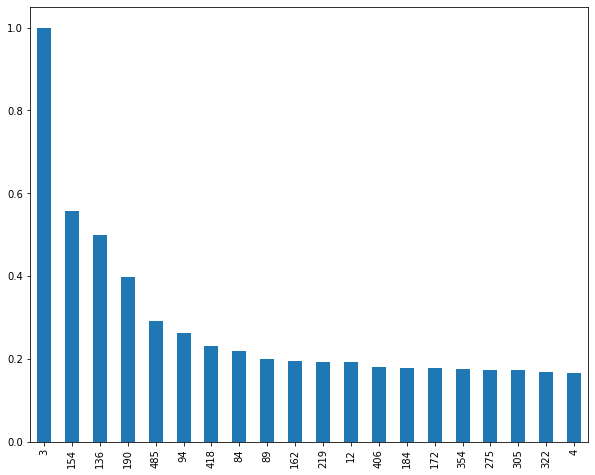

In [60]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = [10,8])

#6.	Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα δεδομένα σας.


 Διάγραμμα με τις 20 πιο συχνές λέξεις

In [61]:
results.sum(axis =0).sort_values(ascending = False).head(20)

ηλεκτρικό     40.885241
μοντέλο       28.670038
αυτοκίνητο    24.529117
εταιρεία      19.671457
νέο           18.790955
οχήματα       13.514060
αμιγώς        11.568993
suv           10.706960
σύμφωνα       10.522494
έκδοση        10.514648
tesla          9.837196
μπαταρία       9.670123
γκάμα          9.458535
πρωτότυπο      8.805946
φαίνεται       7.926911
παραγωγή       7.913835
αυτονομία      7.345215
κάνει          7.172216
δύο            7.158962
2021           7.079039
dtype: float64

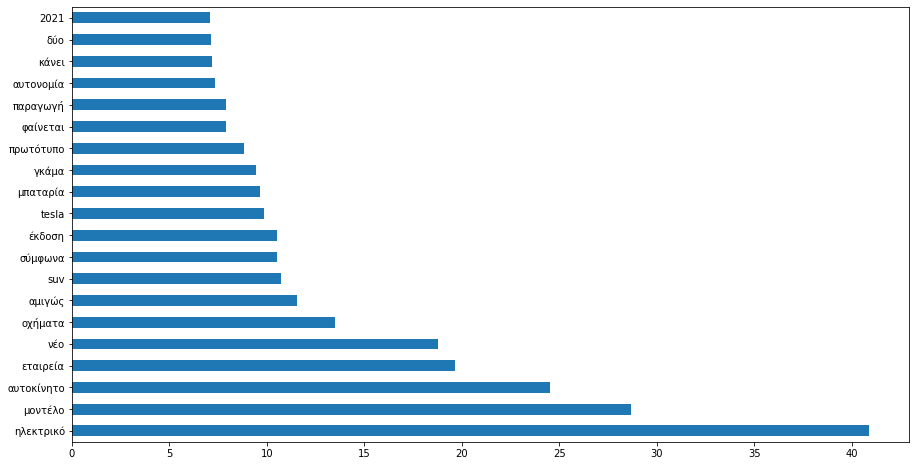

In [62]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [63]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


κυβέρνηση  κυβέρνησης  κυβερνήσεων  ...  κυριότερες  κυψέλες  κυψελών
0          0           0            0  ...           0        0        0
1          0           0            0  ...           0        0        0
2          0           0            0  ...           0        0        0
3          0           0            0  ...           0        0        0
4          0           0            0  ...           0        0        0

[5 rows x 20 columns]

In [64]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

mercedes benz  pick up  ...  πλήρως ηλεκτρικό  πρόσφατη συνέντευξή
0              0        0  ...                 0                    0
1              0        0  ...                 0                    0
2              0        0  ...                 0                    0
3              0        0  ...                 0                    0
4              0        0  ...                 0                    0

[5 rows x 20 columns]

In [65]:
results.sum(axis =0).sort_values(ascending = False)

ηλεκτρικό αυτοκίνητο    95
ηλεκτρικό μοντέλο       58
αμιγώς ηλεκτρικό        56
ηλεκτρικό οχήματα       44
ηλεκτρικό suv           21
διευθύνων σύμβουλος     20
pick up                 19
νέο ηλεκτρικό           17
εσωτερικής καύσης       17
start up                16
νέο μοντέλο             13
plug in                 13
πλήρως ηλεκτρικό        12
παραγωγή ηλεκτρικό      11
λίγες μέρες             11
ηλεκτρικό sedan         11
mercedes benz           10
ηλεκτρικό crossover      9
ηλεκτρικό έκδοση         9
πρόσφατη συνέντευξή      9
dtype: int64

Διάγραμμα με τις 20 συχνότερες φράσεις

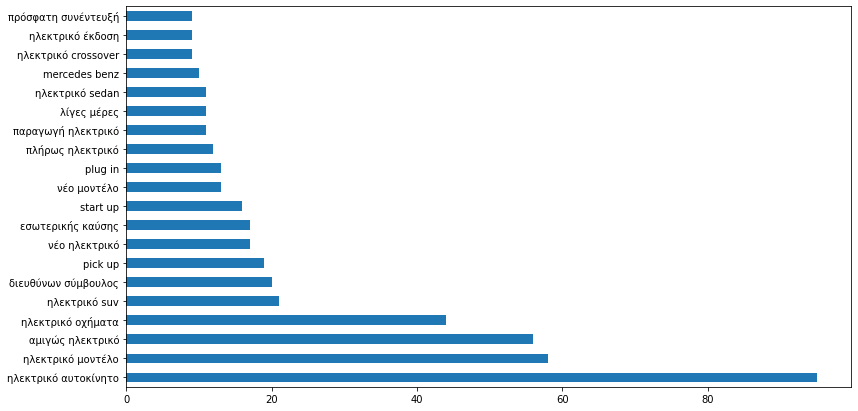

In [66]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(20).plot(kind="barh", figsize=(13, 7)) 

In [67]:
#Ποιος γράφει τα περισσότερα άρθρα στο Newsauto
dfNewsauto['author'].value_counts()


newsautoteam                                                                 337
Κωνσταντίνος Μποϊδάνης (km@carmgz.gr)                                         68
Κωνσταντίνος Μποϊδάνης                                                        35
Γιώργος Σκευοφύλαξ (gs@newsauto.gr)                                           19
Γιώργος Κ. Ανδρής (ga@newsauto.gr)                                             8
Αναστάσης Γαλάνης (ag@newsauto.gr)                                             7
newsmototeam                                                                   2
του Γιάννη Σκουφή (gsk@newsauto.gr)                                            2
Σπύρος Χώτος (sh@newsauto.gr)                                                  2
Του Γιάννη Σκουφή                                                              1
Νίκος Μαρινόπουλος (nm@newsauto.gr), Φωτογραφίες: Χρήστος Καραγιωργάκης        1
Νίκος Μαρινόπουλος (nm@newsauto.gr)                                            1
Κωνσταντίνος ΜποΪδάνης      

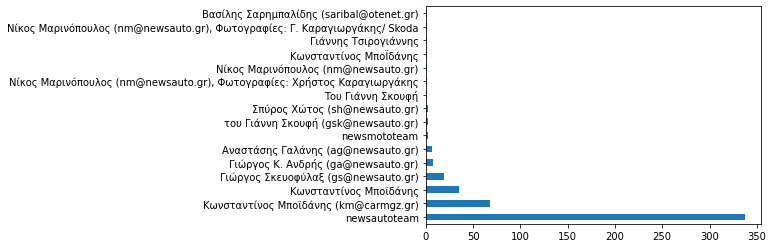

In [68]:
dfNewsauto['author'].value_counts().plot(kind='barh')

#5. Θα προσθέσουμε στήλες με τη χρονιά, τον μήνα και την ημερομηνία. Στη συνέχεια θα κάνουμε μια ακόμη καινούργια στήλη, όπου θα είναι και πάλι ολόκληρη η ημερομηνία. Αυτό είναι κάτι που πρέπει να γίνει, γιατί η ημερομηνία ήταν ελληνική (πρώτα η ημέρα και μετά ο μήνας), οπότε αν κάναμε ημερομηνία και όχι string την προϋπάρχουσα στήλη θα γινόταν λάθος

In [69]:
dfNewsauto['day'] = dfNewsauto['date'].str[0:2]
dfNewsauto['month'] = dfNewsauto['date'].str[3:5]
dfNewsauto['year'] = dfNewsauto['date'].str[6:11]

In [70]:
dfNewsauto['finaldate'] =  pd.to_datetime(dfNewsauto[['year', 'month', 'day']])

In [71]:
dfNewsauto

title  ...  finaldate
0    Το ηλεκτρικό επαγγελματικό Peugeot e-Expert «κ...  ... 2021-04-28
1         Audi: Νέο ηλεκτρικό στη θέση του επόμενου A1  ... 2021-02-11
2    Crossover το πρώτο ηλεκτρικό μοντέλο της συνερ...  ... 2021-06-04
3      Το πρώτο ηλεκτρικό αυτοκινούμενο είναι της LEVC  ... 2021-07-04
4    Elation Freedom: Το ηλεκτρικό hypercar των 1.4...  ... 2020-11-19
..                                                 ...  ...        ...
482    Χαμηλή η… τάση στο πρόγραμμα Κινούμαι Ηλεκτρικά  ... 2021-06-14
483                 Νέο ηλεκτρικό μοντέλο από την Κίνα  ... 2020-10-04
484                   Kia: 7 νέα ηλεκτρικά έως το 2027  ... 2021-01-24
485       Με αυτονομία 500 χλμ η νέα Mercedes-Benz EQB  ... 2021-03-03
486         Καλοκαίρι του 2021 η παρουσίαση των Rivian  ... 2020-11-15

[487 rows x 10 columns]

In [72]:
#Σορτάρουμε τις ειδήσεις ανά ημερομηνία
dfNewsauto.sort_values(by=['finaldate'], inplace=True, ascending=False)

In [73]:
#διώχνουμε και το αρχικό date, που πλέον δεν χρησιμεύει σε κάτι
dfNewsauto.drop(['date'], axis=1)

title  ...  finaldate
3      Το πρώτο ηλεκτρικό αυτοκινούμενο είναι της LEVC  ... 2021-07-04
176    Το Honda S2000 του μέλλοντος θα είναι ηλεκτρικό  ... 2021-07-04
393  H BMW ξεκίνησε τις δοκιμές της υδρογονοκίνητης X5  ... 2021-07-04
347  Rinspeed CitySnap: Αρθρωτό όχημα για τις παραδ...  ... 2021-07-03
268  Ηλεκτρική η Jaguar E-Type με αυτονομία 400 χιλ...  ... 2021-07-03
..                                                 ...  ...        ...
362               Το κινέζικο hypercar των 1.420 ίππων  ... 2020-09-30
76            Ένα πρωτότυπο Mazda με τεχνητή νοημοσύνη  ... 2020-09-30
260   Nissan Re-LEAF: Ηλεκτρικό όχημα εκτάκτων αναγκών  ... 2020-09-29
57   Συνεργασία Kia Hellas και Wallbox στα ηλεκτρικ...  ... 2020-09-29
365  Η Great Wall παρουσιάζει φουτουριστικό ρετρό π...  ... 2020-09-29

[487 rows x 9 columns]

In [74]:
dfNewsauto.dtypes

title                object
date                 object
author               object
lead                 object
body                 object
url                  object
day                  object
month                object
year                 object
finaldate    datetime64[ns]
dtype: object

In [75]:
dfNewsauto.head(10)

title  ...  finaldate
3      Το πρώτο ηλεκτρικό αυτοκινούμενο είναι της LEVC  ... 2021-07-04
176    Το Honda S2000 του μέλλοντος θα είναι ηλεκτρικό  ... 2021-07-04
393  H BMW ξεκίνησε τις δοκιμές της υδρογονοκίνητης X5  ... 2021-07-04
347  Rinspeed CitySnap: Αρθρωτό όχημα για τις παραδ...  ... 2021-07-03
268  Ηλεκτρική η Jaguar E-Type με αυτονομία 400 χιλ...  ... 2021-07-03
15   Το Peugeot e-2008 είναι κορυφαίο στην καθημερι...  ... 2021-07-02
467  Ένα Tesla Model 3 ιδανικό για… κάγκουρες (+video)  ... 2021-07-02
67         Skoda Fabia Rally2 evo: Τώρα και ηλεκτρική!  ... 2021-07-02
131             Πιθανή ανάκληση για τις Porsche Taycan  ... 2021-07-02
387  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκ...  ... 2021-07-02

[10 rows x 10 columns]

#8 Κάνω την ημερομηνία index
(πρέπει να γίνει αφού μπουν πρώτα αξίες για τα συναισθήματα σε κάθε κείμενο)

In [123]:
#Κάνω την ημερομηνία index
dfNewsauto.set_index('finaldate' , inplace=True)

In [124]:
dfNewsauto

title  ... fear
finaldate                                                      ...     
2021-07-04    Το πρώτο ηλεκτρικό αυτοκινούμενο είναι της LEVC  ...    1
2021-07-04    Το Honda S2000 του μέλλοντος θα είναι ηλεκτρικό  ...    1
2021-07-04  H BMW ξεκίνησε τις δοκιμές της υδρογονοκίνητης X5  ...    1
2021-07-03  Rinspeed CitySnap: Αρθρωτό όχημα για τις παραδ...  ...    1
2021-07-03  Ηλεκτρική η Jaguar E-Type με αυτονομία 400 χιλ...  ...    0
...                                                       ...  ...  ...
2020-09-30               Το κινέζικο hypercar των 1.420 ίππων  ...    0
2020-09-30           Ένα πρωτότυπο Mazda με τεχνητή νοημοσύνη  ...    3
2020-09-29   Nissan Re-LEAF: Ηλεκτρικό όχημα εκτάκτων αναγκών  ...    0
2020-09-29  Συνεργασία Kia Hellas και Wallbox στα ηλεκτρικ...  ...    2
2020-09-29  Η Great Wall παρουσιάζει φουτουριστικό ρετρό π...  ...    1

[487 rows x 19 columns]

In [125]:
dfNewsauto['month'].value_counts()

01    65
12    63
10    58
04    52
05    52
06    51
11    49
03    42
02    38
07    12
09     5
Name: month, dtype: int64

In [126]:
dfNewsauto[dfNewsauto.index.month == 1]

title  ... fear
finaldate                                                      ...     
2021-01-31      Συνεργασία ανοιχτής θαλάσσης για VW και Cupra  ...    0
2021-01-31  H Porsche Taycan Turbo γράφει χρόνο στο Hocken...  ...    3
2021-01-31  Η JLR συνεχίζει την έρευνα για πλατφόρμες από ...  ...    0
2021-01-30  Δοκιμές με καμουφλάζ για το ηλεκτρικό crossove...  ...    0
2021-01-30  Δείτε το νέο εσωτερικό των αυτοκινήτων της Tes...  ...    0
...                                                       ...  ...  ...
2021-01-03   Μισές οι αντιπροσωπείες της Cadillac σε 2 χρόνια  ...    0
2021-01-02  H Brennero είναι τo ηλεκτρικό crossover της Al...  ...    0
2021-01-02  Τουρκία: Εγχώριες μπαταρίες για το πρώτο ηλεκτ...  ...    1
2021-01-01     BMW: Μπαταρίες από τη Λειψία στα μέσα του 2021  ...    2
2021-01-01           Tesla: Ήχοι “a la carte” για τους πεζούς  ...    0

[65 rows x 19 columns]

#9	Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα σε νέες στήλες στο dataframe των δεδομένων σας.


In [76]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [77]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

Διαβάζουμε το EmoLex

In [78]:
NewsAutoText = dfNewsauto['body'].str.cat(sep = ' ').replace("amp", '')

In [79]:
NewsAutoText

'[Η εταιρεία <=""-388291">, Η βρετανική εταιρεία LEVC, που έχει γίνει ευρέως γνωστή ως ο κατασκευαστής των φημισμένων λονδρέζικων ταξί και βρίσκεται κάτω από την «ομπρέλα» του κινεζικού Ομίλου της <=" [Η φαντασία και η δημιουργικότητα ενός ψηφιακού καλλιτέχνη είχε αποτέλεσμα την δημιουργία ενός φουτουριστικού ηλεκτρικό <=""-386704">, Για τους μεγαλύτερους σε ηλικία φίλους της αυτοκίνησης το roadster μοντέλο της <=" [To πρωτότυπο <=""-385331">, Συγκρίνοντας τα συμβατικής τεχνολογίας ή υβριδικής τεχνολογίας οχήματα με αυτά που χρησιμοποιούν κυψέλες καυσίμου υδρογόνου, τα τελευταία σπανίζουν, καθώς λίγοι είναι ουσιαστικά οι κατασκευαστές που τα διαθέτουν στο ευρύ κοινό, όπως οι <=" [Καινοτόμος βιωσιμότητα και αποτελεσματικότητα στις παραδόσεις: Οι κινητοί σταθμοί θυρίδων, μπορούν να βοηθήσουν στην αποφυγή κυκλοφοριακού προβλήματος στις μεγάλες πόλεις."-388892">, \xa0, Το «CitySnap» υπόσχεται να μειώσει το «μποτιλιάρισμα», τις εκπομπές ρύπων αλλά και το κόστος, εστιάζοντας στην άνεση και τ

In [80]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [82]:
nlp = spacy.load('el_core_news_sm')

In [83]:
list(nlp.Defaults.stop_words)[0:10]

['ήδη',
 'συχνάς',
 'πούθε',
 'εκάστους',
 'μόνην',
 'εσάς',
 'δικούς',
 'ποιά',
 'τρεις',
 'μόλις']

In [84]:
NewsAutodoc = nlp(dfNewsauto['body'][1])

In [85]:
NewsAutodoc

[Η <=""-356248">, Η ηλεκτρικό κινητικότητα αποτελεί πλέον μία πάγια προτεραιότητα για την Audi, με την γερμανική εταιρεία να «παγώνει» την εξέλιξη αρκετών μοντέλο με θερμικά σύνολα, θέλοντας να περιορίσει παράλληλα και τα αυξημένα κόστη κατασκευής των EV οχήματα της.,  ="">< ="" ="-356269 -" "

In [86]:
for token in NewsAutodoc:
    print(token, token.lemma_)

[ [
Η η
< <
= =
" "
" "
-356248 -356248
" "
> >
, ,
Η η
ηλεκτρικό ηλεκτρικό
κινητικότητα κινητικότητα
αποτελεί αποτελώ
πλέον πλέον
μία μία
πάγια πάγιο
προτεραιότητα προτεραιότητα
για για
την την
Audi audi
, ,
με με
την την
γερμανική γερμανικός
εταιρεία εταιρεία
να να
« «
παγώνει παγώνω
» »
την την
εξέλιξη εξέλιξη
αρκετών αρκετή
μοντέλο μοντέλο
με με
θερμικά θερμικά
σύνολα σύνολο
, ,
θέλοντας θέλω
να να
περιορίσει περιορίσω
παράλληλα παράλληλα
και και
τα τα
αυξημένα αυξημένος
κόστη κόστη
κατασκευής κατασκευή
των των
EV ev
οχήματα οχήματο
της της
. .
, ,
   
= =
" "
" "
> >
< <
= =
" "
" "
= =
" "
-356269 -356269
- -
" "
" "


In [87]:
NewsAutoText

'[Η εταιρεία <=""-388291">, Η βρετανική εταιρεία LEVC, που έχει γίνει ευρέως γνωστή ως ο κατασκευαστής των φημισμένων λονδρέζικων ταξί και βρίσκεται κάτω από την «ομπρέλα» του κινεζικού Ομίλου της <=" [Η φαντασία και η δημιουργικότητα ενός ψηφιακού καλλιτέχνη είχε αποτέλεσμα την δημιουργία ενός φουτουριστικού ηλεκτρικό <=""-386704">, Για τους μεγαλύτερους σε ηλικία φίλους της αυτοκίνησης το roadster μοντέλο της <=" [To πρωτότυπο <=""-385331">, Συγκρίνοντας τα συμβατικής τεχνολογίας ή υβριδικής τεχνολογίας οχήματα με αυτά που χρησιμοποιούν κυψέλες καυσίμου υδρογόνου, τα τελευταία σπανίζουν, καθώς λίγοι είναι ουσιαστικά οι κατασκευαστές που τα διαθέτουν στο ευρύ κοινό, όπως οι <=" [Καινοτόμος βιωσιμότητα και αποτελεσματικότητα στις παραδόσεις: Οι κινητοί σταθμοί θυρίδων, μπορούν να βοηθήσουν στην αποφυγή κυκλοφοριακού προβλήματος στις μεγάλες πόλεις."-388892">, \xa0, Το «CitySnap» υπόσχεται να μειώσει το «μποτιλιάρισμα», τις εκπομπές ρύπων αλλά και το κόστος, εστιάζοντας στην άνεση και τ

In [88]:
' '.join(token.lemma_ for token in NewsAutodoc)

'[ η < = " " -356248 " > , η ηλεκτρικό κινητικότητα αποτελώ πλέον μία πάγιο προτεραιότητα για την audi , με την γερμανικός εταιρεία να « παγώνω » την εξέλιξη αρκετή μοντέλο με θερμικά σύνολο , θέλω να περιορίσω παράλληλα και τα αυξημένος κόστη κατασκευή των ev οχήματο της . ,   = " " > < = " " = " -356269 - " "'

In [89]:
NewsAutoFull = nlp(NewsAutoText)

In [90]:
NewsAutoClear = ' '.join(token.lemma_ for token in NewsAutoFull)

In [91]:
NewsAutoClear

'[ η εταιρεία < = " " -388291 " > , η βρετανικός εταιρεία levc , που έχω γίνω ευρέως γνωστός ως ο κατασκευαστής των φημισμένος λονδρέζικο ταξί και βρίσκομαι κάτω από την « ομπρέλα » του κινεζικός ομίλο της < = " [ η φαντασία και η δημιουργικότητα ενός ψηφιακός καλλιτέχνη έχω αποτέλεσμα την δημιουργία ενός φουτουριστικός ηλεκτρικό < = " " -386704 " > , για τους μεγαλύτερου σε ηλικία φίλου της αυτοκίνηση το roadster μοντέλο της < = " [ to πρωτότυπο < = " " -385331 " > , συγκρίνω τα συμβατικός τεχνολογία ή υβριδικός τεχνολογία οχήματο με αυτά που χρησιμοποιώ κυψέλες καυσίμο υδρογόνο , τα τελευταίος σπανίζω , καθώς λίγος είναι ουσιαστικά οι κατασκευαστής που τα διαθέτω στο ευρύ κοινό , όπως οι < = " [ καινοτόμος βιωσιμότητα και αποτελεσματικότηα στις παραδόσεις : οι κινητός σταθμός θυρίδων , μπορώ να βοηθήσω στην αποφυγός κυκλοφοριακός προβλήματο στι μεγάλες πόλεις."-388892 " > ,    , το « citysnap » υπόσχομαι να μειώσω το « μποτιλιάρισμα » , τις εκπομπός ρύπο αλλά και το κόστος , εστιάζω 

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [93]:
count_vector = cv.fit_transform(dfNewsauto['body'])

In [94]:
count_vector.shape

(487, 7543)

In [95]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  10  100  102  105  10gwh  ...  ώμους  ώρα  ώρας  ώρες  ώστε  ώστιν
0    0   0    0    0    0      0  ...      0    0     0     0     0      0
1    0   0    0    0    0      0  ...      0    0     0     0     0      0
2    0   0    0    0    0      0  ...      0    0     0     0     0      0
3    0   0    0    0    0      0  ...      0    0     0     0     0      0
4    0   0    0    0    0      0  ...      0    1     0     0     0      0

[5 rows x 7543 columns]

In [96]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [97]:
count_vector = cv.fit_transform(dfNewsauto['body'])

In [98]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  10  100  12  120  180  19  ...  χώρο  όμιλος  όνομα  όχημα  όψη  ύψος  ώρα
0     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
1     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
2     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
3     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
4     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    1
5     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
6     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
7     0   0    0   0    2    0   0  ...     0       0      0      0    0     0    0
8     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
9     0   0    0   0    0    0   0  ...     0       0      0      0    0     0    1
10    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
11    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
12    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
13    1   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
14    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
15    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
16    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
17    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
18    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0
19    0   0    0   0    0    0   0  ...     0       0      0      0    0     0    0

[20 rows x 745 columns]

In [99]:
from html import unescape
def my_tokenizer(NewsAutodoc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(NewsAutodoc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [100]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfNewsauto['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


100  100%  2016  2017  2018  2019  ...  όμιλος  όνομας  όχημα  όψη  ύψο  ώρα
0    0     0     0     0     0     0  ...       0       0      0    0    0    0
1    0     0     0     0     0     0  ...       0       0      0    0    0    0
2    0     0     0     0     0     0  ...       0       0      0    0    0    0
3    0     0     0     0     0     0  ...       0       0      0    0    0    0
4    0     0     0     0     0     0  ...       0       0      0    0    0    0

[5 rows x 731 columns]

In [101]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfNewsauto['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


suv  tesla  έκδοση  αγορά  ...  παραγωγή  σύμφωνα  τεχνολογία  φόρτιση
0    0      0       0      0  ...         0        0           0        0
1    0      0       0      0  ...         0        0           0        0
2    0      0       0      0  ...         0        0           2        0
3    0      0       0      0  ...         0        0           0        0
4    0      0       1      0  ...         0        1           0        0

[5 rows x 20 columns]

In [102]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


suv  tesla  έκδοση  αγορά  ...  παραγωγή  σύμφωνα  τεχνολογία  φόρτιση
0    0      0       0      0  ...         0        0           0        0
1    0      0       0      0  ...         0        0           0        0
2    0      0       0      0  ...         0        0           2        0
3    0      0       0      0  ...         0        0           0        0
4    0      0       1      0  ...         0        1           0        0

[5 rows x 20 columns]

In [103]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2), token_pattern = '\\bκυ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfNewsauto['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


volta zero  αμιγώς ηλεκτρικό  ...  πλήρως ηλεκτρικό  πρόσφατη συνέντευξή
0           0                 0  ...                 0                    0
1           0                 0  ...                 0                    0
2           0                 0  ...                 0                    0
3           0                 0  ...                 0                    0
4           0                 0  ...                 0                    0

[5 rows x 20 columns]

In [104]:
results.sum(axis =0).sort_values(ascending = False)

ηλεκτρικό αυτοκίνητο    93
αμιγώς ηλεκτρικό        56
ηλεκτρικό μοντέλο       52
ηλεκτρικό οχήματο       43
νέος ηλεκτρικό          24
ηλεκτρικό suv           21
νέος μοντέλο            18
εσωτερικός καύση        17
διευθύνος σύμβουλος     17
παραγωγή ηλεκτρικό      15
μπαταρία ηλεκτρικό      12
πλήρως ηλεκτρικό        12
λίγες μέρα              11
ηλεκτρικό sedan         10
πρόσφατη συνέντευξή      9
δελτίο τύπου             9
ηλεκτρικό έκδοση         9
δύο εταιρεία             9
βρετανικός εταιρεία      8
volta zero               8
dtype: int64

In [105]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(17)   

ηλεκτρικό αυτοκίνητο    93
αμιγώς ηλεκτρικό        56
ηλεκτρικό μοντέλο       52
ηλεκτρικό οχήματο       43
νέος ηλεκτρικό          24
ηλεκτρικό suv           21
νέος μοντέλο            18
εσωτερικός καύση        17
διευθύνος σύμβουλος     17
παραγωγή ηλεκτρικό      15
μπαταρία ηλεκτρικό      12
πλήρως ηλεκτρικό        12
λίγες μέρα              11
ηλεκτρικό sedan         10
πρόσφατη συνέντευξή      9
δελτίο τύπου             9
ηλεκτρικό έκδοση         9
dtype: int64

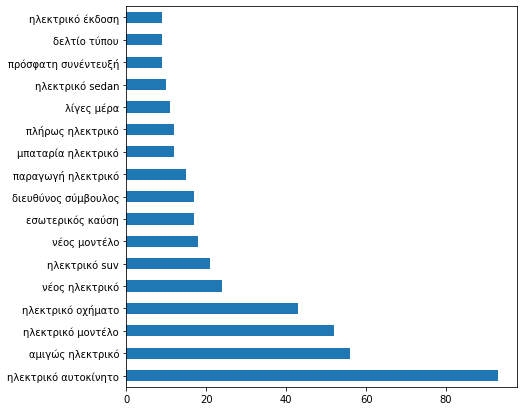

In [106]:
sum_words.sort_values(ascending = False).head(17).plot(kind = 'barh', figsize=(7,7))

In [107]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [108]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [109]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [110]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [111]:
emolex_df.tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [112]:
nlp = spacy.load("el_core_news_sm")

In [113]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [114]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(dfNewsauto['body'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [115]:
wordcount_df.shape

(487, 13161)

In [116]:
emolex_df.head()

index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [117]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [118]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [119]:
dfNewsauto.head(3)

title  ...  finaldate
3      Το πρώτο ηλεκτρικό αυτοκινούμενο είναι της LEVC  ... 2021-07-04
176    Το Honda S2000 του μέλλοντος θα είναι ηλεκτρικό  ... 2021-07-04
393  H BMW ξεκίνησε τις δοκιμές της υδρογονοκίνητης X5  ... 2021-07-04

[3 rows x 10 columns]

In [120]:
dfNewsauto['anger'] = wordcount_df[angry_words].sum(axis=1)

dfNewsauto['positivity'] = wordcount_df[positive_words].sum(axis=1)

dfNewsauto['joy'] = wordcount_df[joy_words].sum(axis=1)

dfNewsauto['disgust'] = wordcount_df[disgust_words].sum(axis=1)

dfNewsauto['surprise'] = wordcount_df[surprise_words].sum(axis=1)

dfNewsauto['trust'] = wordcount_df[trust_words].sum(axis=1)

dfNewsauto['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

dfNewsauto['sadness'] = wordcount_df[sadness_words].sum(axis=1)

dfNewsauto['negative'] = wordcount_df[negative_words].sum(axis=1)

dfNewsauto['fear'] = wordcount_df[fear_words].sum(axis=1)

In [121]:
dfNewsauto

title  ... fear
3      Το πρώτο ηλεκτρικό αυτοκινούμενο είναι της LEVC  ...    1
176    Το Honda S2000 του μέλλοντος θα είναι ηλεκτρικό  ...    1
393  H BMW ξεκίνησε τις δοκιμές της υδρογονοκίνητης X5  ...    1
347  Rinspeed CitySnap: Αρθρωτό όχημα για τις παραδ...  ...    1
268  Ηλεκτρική η Jaguar E-Type με αυτονομία 400 χιλ...  ...    0
..                                                 ...  ...  ...
362               Το κινέζικο hypercar των 1.420 ίππων  ...    0
76            Ένα πρωτότυπο Mazda με τεχνητή νοημοσύνη  ...    3
260   Nissan Re-LEAF: Ηλεκτρικό όχημα εκτάκτων αναγκών  ...    0
57   Συνεργασία Kia Hellas και Wallbox στα ηλεκτρικ...  ...    2
365  Η Great Wall παρουσιάζει φουτουριστικό ρετρό π...  ...    1

[487 rows x 20 columns]

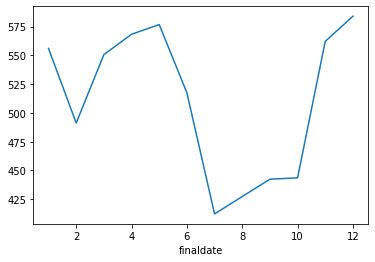

In [127]:
dfNewsauto['body'].str.len().groupby(by=dfNewsauto.index.month).mean().plot()

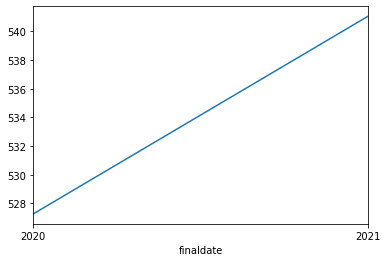

In [128]:
dfNewsauto['body'].str.len().resample('A').mean().plot() 

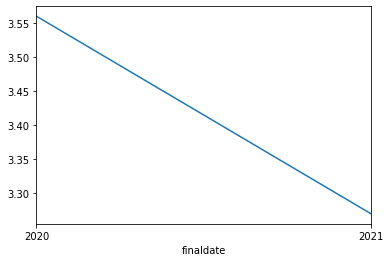

In [129]:
dfNewsauto['positivity'].resample('A').mean().plot() 

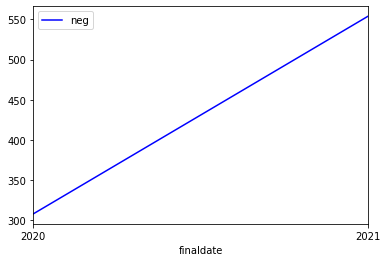

In [130]:
dfNewsauto['negative'].resample('A').sum().plot(color = 'b',label = 'neg').legend() 

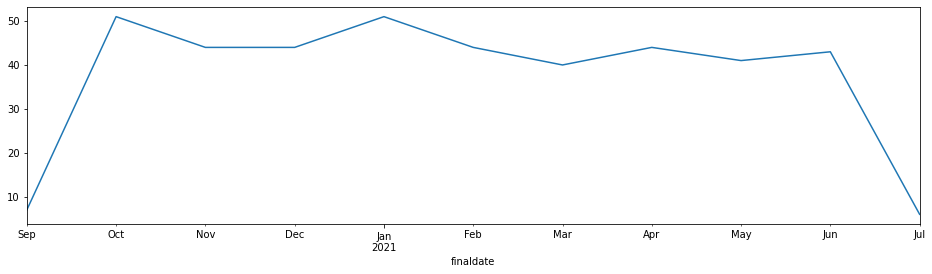

In [131]:
dfNewsauto['anger'].resample('M').sum().plot(figsize=(16,4))

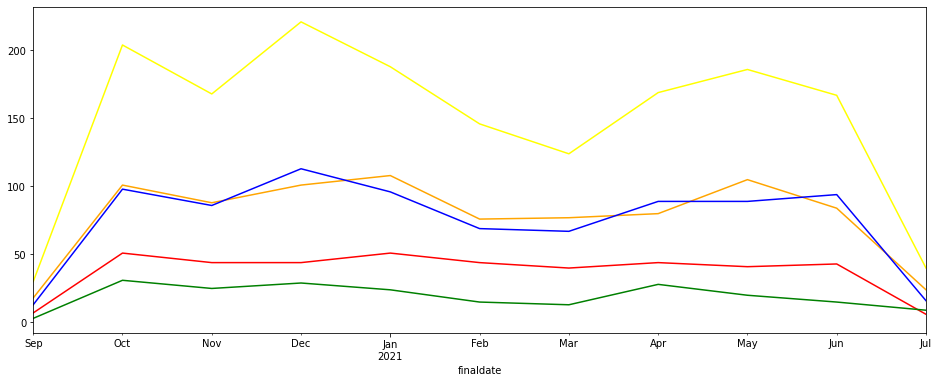

In [132]:
ax = dfNewsauto['anger'].resample('M').sum().plot(figsize=(16,6), color = 'red')
dfNewsauto['joy'].resample('M').sum().plot(figsize=(16,6), ax = ax, color = 'green')
dfNewsauto['positivity'].resample('M').sum().plot(figsize=(16,6), color = 'yellow')
dfNewsauto['negative'].resample('M').sum().plot(figsize=(16,6), ax = ax, color = 'orange')
dfNewsauto['trust'].resample('M').sum().plot(figsize=(16,6), ax = ax, color = 'blue')

In [133]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

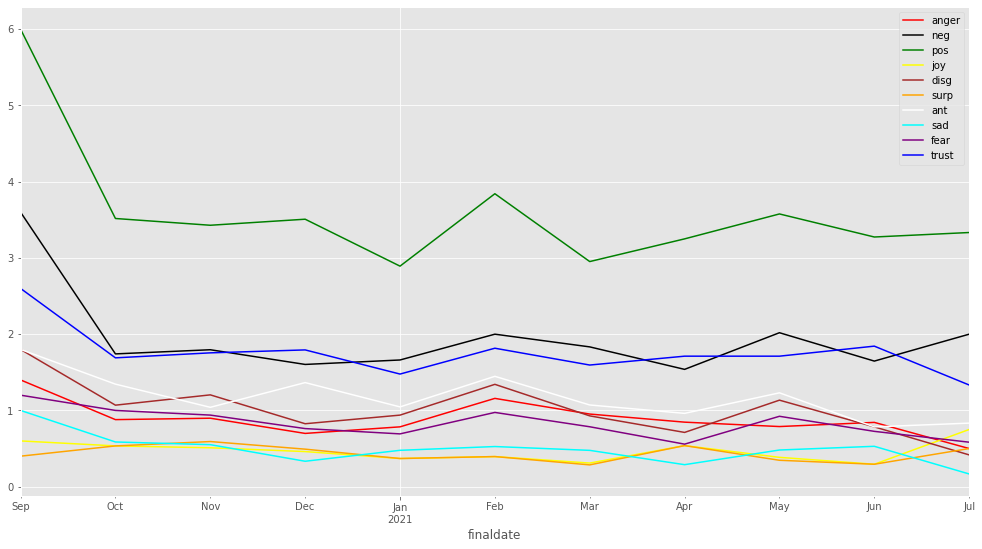

In [134]:
ax = dfNewsauto['anger'].resample('M').mean().plot(figsize=(16,7), 
                                                          color = 'red', label='anger')

dfNewsauto['negative'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'neg', color = 'black')

dfNewsauto['positivity'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'pos', color = 'green')

dfNewsauto['joy'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'joy', color = 'yellow')

dfNewsauto['disgust'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'disg', color = 'brown')

dfNewsauto['surprise'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'surp', color = 'orange')

dfNewsauto['anticipation'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'ant', color = 'white')

dfNewsauto['sadness'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'sad', color = 'cyan')

dfNewsauto['fear'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'fear', color = 'purple')

dfNewsauto['trust'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

In [136]:
dfNewsauto[['anger','positivity','joy','disgust','surprise','trust','anticipation','sadness','negative','fear']].sum()

anger            415
positivity      1643
joy              212
disgust          474
surprise         211
trust            830
anticipation     556
sadness          227
negative         862
fear             394
dtype: int64

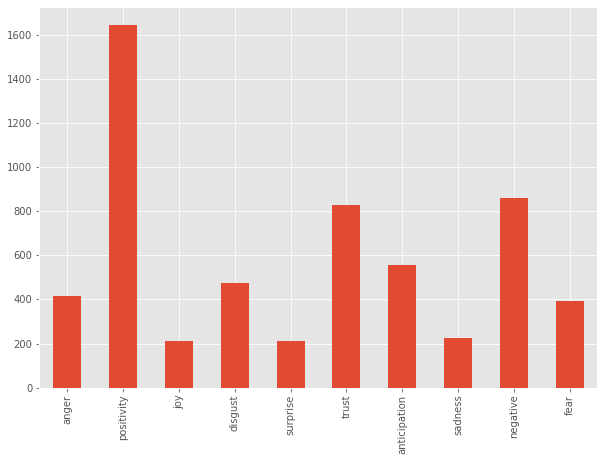

In [135]:
dfNewsauto[['anger','positivity','joy','disgust','surprise','trust','anticipation','sadness','negative','fear']].sum().plot(kind = 'bar', figsize=(10,7))